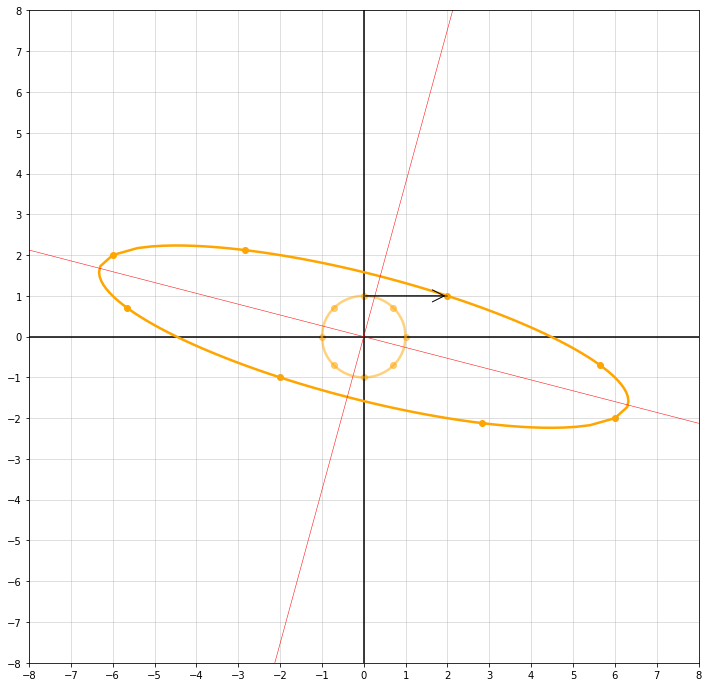

In [45]:
import numpy as np
import matplotlib.pyplot as plt

'''
Symmetric matrix for circle transformation.
Should be like:
    A   X
    X   B
'''
matrix = np.array([[-6, 2],
                  [2, 1]])

x_points_circle = np.cos(np.linspace(0, 7 / 4 * np.pi, 8))
y_points_circle = np.sin(np.linspace(0, 7 / 4 * np.pi, 8))

xy_points_circle = np.stack([x_points_circle, y_points_circle])
xy_points_ellipse = matrix @ xy_points_circle

x_points_ellipse, y_points_ellipse = xy_points_ellipse

x_lim = 8
y_lim = 8

plt.figure(figsize=(12, 12))
plt.grid(True, alpha=.5)
plt.xlim(-x_lim, x_lim)
plt.ylim(-y_lim, y_lim)
plt.xticks(range(-x_lim, x_lim + 1))
plt.yticks(range(-y_lim, y_lim + 1))
plt.plot([-10, 10], [0, 0], c='black')
plt.plot([0, 0], [-10, 10], c='black')


plt.scatter(x_points_circle, y_points_circle, c='orange', alpha=.5)

x_circle = np.linspace(-1, 1, 81)
y_circle = (1 - x_circle**2)**0.5

plt.plot(x_circle, y_circle, c='orange', linewidth=2.5, alpha=.5)
plt.plot(x_circle, -y_circle, c='orange', linewidth=2.5, alpha=.5)


plt.scatter(x_points_ellipse, y_points_ellipse, c='orange')

xy_circle = np.stack([x_circle, y_circle])
xy_ellipse = matrix @ xy_circle
x_ellipse, y_ellipse = xy_ellipse
plt.plot(x_ellipse, y_ellipse, c='orange', linewidth=2.5)

xy_circle = np.stack([x_circle, -y_circle])
xy_ellipse = matrix @ xy_circle
x_ellipse, y_ellipse = xy_ellipse
plt.plot(x_ellipse, y_ellipse, c='orange', linewidth=2.5)


v, w = np.linalg.eig(matrix)
v, w

x_axis, y_axis = w
k = y_axis / x_axis
x_ax = np.array([-x_lim, x_lim])
y_ax_1 = x_ax * k[0]
y_ax_2 = x_ax * k[1]

plt.plot(x_ax, y_ax_1, c='r', linewidth=.5)
plt.plot(x_ax, y_ax_2, c='r', linewidth=.5)


arrow = plt.plot([x_points_circle[2], x_points_ellipse[2]], [y_points_circle[2], y_points_ellipse[2]], c='black', alpha=.5)[0]
_ = arrow.axes.annotate('',
        xytext=(x_points_circle[2], y_points_circle[2]),
        xy=(x_points_ellipse[2], y_points_ellipse[2]),
        arrowprops=dict(arrowstyle="->"),
        size=30, alpha=.1)